In [205]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import scipy.stats as stats 

from datetime import datetime as dt 

In [206]:
# DATA EXPLORATORY ANALYSIS FOR  INSURANCE CLAIMS DATA

### 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.


In [207]:
claims = pd.read_csv('C://Datascience Projects/Python/Casestudy/Python Foundation Case Study 3 - Insurance Claims Case Study/Case Study 3 - Insurance Claims Case Study/claims.csv')

In [208]:
demogs = pd.read_csv('C://Datascience Projects/Python/Casestudy/Python Foundation Case Study 3 - Insurance Claims Case Study/Case Study 3 - Insurance Claims Case Study/cust_demographics.csv')

In [209]:
claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [210]:
demogs.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [211]:
claims.shape

(1100, 10)

In [212]:
demogs.shape

(1085, 6)

In [213]:
data = pd . merge(demogs,claims,
               left_on = 'CUST_ID',
               right_on = 'customer_id',
               how = 'inner')

In [214]:
data.shape

(1085, 16)

In [215]:
data.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No


In [216]:
 data.drop(columns=['customer_id'], inplace=True)

In [217]:
data.head(4)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No


### 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CUST_ID              1085 non-null   int64  
 1   gender               1085 non-null   object 
 2   DateOfBirth          1085 non-null   object 
 3   State                1085 non-null   object 
 4   Contact              1085 non-null   object 
 5   Segment              1085 non-null   object 
 6   claim_id             1085 non-null   int64  
 7   incident_cause       1085 non-null   object 
 8   claim_date           1085 non-null   object 
 9   claim_area           1085 non-null   object 
 10  police_report        1085 non-null   object 
 11  claim_type           1085 non-null   object 
 12  claim_amount         1020 non-null   object 
 13  total_policy_claims  1075 non-null   float64
 14  fraudulent           1085 non-null   object 
dtypes: float64(1), int64(2), object(12)
me

In [219]:
# Mismatch data types 

In [220]:
data['DateOfBirth']= pd.to_datetime(data['DateOfBirth'])
data['claim_date']= pd.to_datetime(data['claim_date'])

C:\Users\Chaitanya\AppData\Local\Temp\ipykernel_18968\3478652578.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['DateOfBirth']= pd.to_datetime(data['DateOfBirth'])


In [221]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CUST_ID              1085 non-null   int64         
 1   gender               1085 non-null   object        
 2   DateOfBirth          1085 non-null   datetime64[ns]
 3   State                1085 non-null   object        
 4   Contact              1085 non-null   object        
 5   Segment              1085 non-null   object        
 6   claim_id             1085 non-null   int64         
 7   incident_cause       1085 non-null   object        
 8   claim_date           1085 non-null   datetime64[ns]
 9   claim_area           1085 non-null   object        
 10  police_report        1085 non-null   object        
 11  claim_type           1085 non-null   object        
 12  claim_amount         1020 non-null   object        
 13  total_policy_claims  1075 non-nul

In [222]:
data['claim_amount'] = data['claim_amount'].str.replace('$', '')

In [223]:
data['claim_amount']

0         2980
1         2980
2       3369.5
3         1950
4         1680
         ...  
1080      1770
1081      2800
1082     33080
1083      2840
1084      1490
Name: claim_amount, Length: 1085, dtype: object

In [224]:
data['claim_amount']=data['claim_amount'].astype('float64')

In [225]:
data.dtypes

CUST_ID                         int64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
claim_id                        int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float64
total_policy_claims           float64
fraudulent                     object
dtype: object

In [226]:
data.Contact

0       789-916-8172
1       265-543-1264
2       798-631-4758
3       798-631-4758
4       413-187-7945
            ...     
1080    459-425-4319
1081    529-462-1635
1082    712-651-9613
1083    469-345-5617
1084    182-385-1392
Name: Contact, Length: 1085, dtype: object

In [227]:
data['Contact']= data['Contact'].str.replace('-','')

In [228]:
data.Contact

0       7899168172
1       2655431264
2       7986314758
3       7986314758
4       4131877945
           ...    
1080    4594254319
1081    5294621635
1082    7126519613
1083    4693455617
1084    1823851392
Name: Contact, Length: 1085, dtype: object

In [229]:
data['Contact']= data ['Contact'].astype('int64')

In [230]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CUST_ID              1085 non-null   int64         
 1   gender               1085 non-null   object        
 2   DateOfBirth          1085 non-null   datetime64[ns]
 3   State                1085 non-null   object        
 4   Contact              1085 non-null   int64         
 5   Segment              1085 non-null   object        
 6   claim_id             1085 non-null   int64         
 7   incident_cause       1085 non-null   object        
 8   claim_date           1085 non-null   datetime64[ns]
 9   claim_area           1085 non-null   object        
 10  police_report        1085 non-null   object        
 11  claim_type           1085 non-null   object        
 12  claim_amount         1020 non-null   float64       
 13  total_policy_claims  1075 non-nul

#### 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [231]:
data.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,1979-01-12,VT,7899168172,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No
1,75740424,Female,2070-01-13,ME,2655431264,Silver,33985796,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No
2,30308357,Female,1984-03-11,TN,7986314758,Silver,53522022,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes
3,30308357,Female,1984-03-11,TN,7986314758,Silver,63017412,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No
4,47830476,Female,1986-05-01,MA,4131877945,Silver,13015401,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No


In [232]:
# 0 ---> no, unknown 
# 1 ---> yes 

In [233]:
data.police_report.value_counts()

police_report
No         621
Unknown    296
Yes        168
Name: count, dtype: int64

In [234]:
data['flag']= np.where(data.police_report.isin(['No', 'Unknown']),0,1)

In [235]:
data.head(10)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,21868593,Female,1979-01-12,VT,7899168172,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0
1,75740424,Female,2070-01-13,ME,2655431264,Silver,33985796,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,0
2,30308357,Female,1984-03-11,TN,7986314758,Silver,53522022,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0
3,30308357,Female,1984-03-11,TN,7986314758,Silver,63017412,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0
4,47830476,Female,1986-05-01,MA,4131877945,Silver,13015401,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0
5,47830476,Female,1986-05-01,MA,4131877945,Silver,91609100,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1.0,No,0
6,19269962,Male,1977-05-13,NV,9568718691,Gold,22890252,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,0
7,19269962,Male,1977-05-13,NV,9568718691,Gold,39219616,Other causes,2018-09-26,Auto,No,Material only,2240.0,2.0,No,0
8,21831191,Male,1977-05-17,NH,4197128513,Gold,24050443,Other driver error,2017-10-04,Auto,No,Injury only,38306.5,3.0,Yes,0
9,21831191,Male,1977-05-17,NH,4197128513,Gold,91475471,Driver error,2018-02-09,Auto,Unknown,Material and injury,36810.0,1.0,No,0


### 5.One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [236]:
data.drop_duplicates(subset=['CUST_ID'],inplace=True)

In [237]:
data.shape

(1078, 16)

In [238]:
data.sort_values(by = 'claim_date', ascending = False, inplace = True)

In [239]:
data.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag
941,46710738,Male,1977-04-28,MO,9628349361,Gold,74761374,Driver error,2018-10-30,Auto,No,Material only,1830.0,1.0,No,0
226,17682060,Female,2074-11-21,NV,1861953465,Gold,49735712,Crime,2018-10-30,Home,Unknown,Material and injury,17020.0,1.0,No,0
286,93915431,Male,2067-09-08,ME,1347851687,Gold,99775483,Other causes,2018-10-30,Auto,No,Material and injury,42124.5,1.0,Yes,0
751,28932340,Male,1996-01-05,LA,6522658231,Gold,25213498,Driver error,2018-10-30,Auto,Unknown,Material only,NaN,1.0,No,0
1055,58451506,Male,2068-04-22,FL,6735747823,Gold,43042986,Natural causes,2018-10-30,Auto,No,Material only,2420.0,1.0,No,0


### 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [240]:
data.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag
941,46710738,Male,1977-04-28,MO,9628349361,Gold,74761374,Driver error,2018-10-30,Auto,No,Material only,1830.0,1.0,No,0
226,17682060,Female,2074-11-21,NV,1861953465,Gold,49735712,Crime,2018-10-30,Home,Unknown,Material and injury,17020.0,1.0,No,0
286,93915431,Male,2067-09-08,ME,1347851687,Gold,99775483,Other causes,2018-10-30,Auto,No,Material and injury,42124.5,1.0,Yes,0
751,28932340,Male,1996-01-05,LA,6522658231,Gold,25213498,Driver error,2018-10-30,Auto,Unknown,Material only,NaN,1.0,No,0
1055,58451506,Male,2068-04-22,FL,6735747823,Gold,43042986,Natural causes,2018-10-30,Auto,No,Material only,2420.0,1.0,No,0


In [241]:
data.dtypes

CUST_ID                         int64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                         int64
Segment                        object
claim_id                        int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float64
total_policy_claims           float64
fraudulent                     object
flag                            int32
dtype: object

In [242]:
data.isnull().sum()

CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
flag                    0
dtype: int64

In [243]:
# mean for continous 
# mode for categorical 

In [244]:
data.claim_amount=data.claim_amount.fillna(data.claim_amount.mean())

In [245]:
data.claim_amount.isna().sum()

0

In [246]:
data.total_policy_claims=data.total_policy_claims.fillna(data.total_policy_claims.mode()[0])

In [247]:
data.total_policy_claims.isnull().sum()

0

### 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria  
#### Children < 18  
#### Youth 18-30
#### Adult 30-60
#### Senior > 60

In [248]:
data['age']= pd.Timestamp.now().year - data['DateOfBirth'].dt.year

In [249]:
def category(x):
    if x <= 18:
        return 'children'
    elif 18 > x <= 30:
        return 'youth'
    elif 30 > x <= 60:
        return 'adult'
    else:
        return 'senior'

In [250]:
data['age_segment']= data['age'].apply(category)

In [251]:
data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,age,age_segment
941,46710738,Male,1977-04-28,MO,9628349361,Gold,74761374,Driver error,2018-10-30,Auto,No,Material only,1830.000000,1.0,No,0,48,senior
226,17682060,Female,2074-11-21,NV,1861953465,Gold,49735712,Crime,2018-10-30,Home,Unknown,Material and injury,17020.000000,1.0,No,0,-49,children
286,93915431,Male,2067-09-08,ME,1347851687,Gold,99775483,Other causes,2018-10-30,Auto,No,Material and injury,42124.500000,1.0,Yes,0,-42,children
751,28932340,Male,1996-01-05,LA,6522658231,Gold,25213498,Driver error,2018-10-30,Auto,Unknown,Material only,12470.498519,1.0,No,0,29,adult
1055,58451506,Male,2068-04-22,FL,6735747823,Gold,43042986,Natural causes,2018-10-30,Auto,No,Material only,2420.000000,1.0,No,0,-43,children
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,74155265,Male,1985-11-16,TX,3927394873,Gold,25647821,Natural causes,2017-01-01,Auto,No,Material only,2080.000000,1.0,No,0,40,senior
120,39587790,Male,2065-01-10,LA,6151543516,Gold,39131766,Other causes,2017-01-01,Auto,No,Material only,2967.000000,1.0,Yes,0,-40,children
181,61745840,Female,1994-07-24,MA,6126845472,Platinum,90591192,Other driver error,2017-01-01,Home,No,Material and injury,30930.000000,1.0,No,0,31,senior
905,42664554,Female,1993-08-13,TN,3969732531,Gold,42280334,Other causes,2017-01-01,Auto,No,Injury only,27670.000000,1.0,No,0,32,senior


## 8. What is the average amount claimed by the customers from various segments?

In [252]:
data.groupby(by = ['Segment']) ['claim_amount'].mean()

Segment
Gold        12756.479697
Platinum    12369.304648
Silver      12269.434851
Name: claim_amount, dtype: float64

### 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [253]:
x = pd.to_datetime('2018-10-1') - pd.Timedelta(days = 20)

In [254]:
x

Timestamp('2018-09-11 00:00:00')

In [255]:
y = data[(data['claim_date']<=x)]

In [256]:
y

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,age,age_segment
1067,78064067,Female,1999-11-04,MS,7134579846,Gold,50845008,Natural causes,2018-09-06,Auto,No,Material only,1090.0,5.0,No,0,26,adult
956,75884493,Female,2069-07-27,VT,1964357259,Gold,3110549,Other driver error,2018-09-06,Auto,Yes,Material and injury,35310.0,6.0,No,1,-44,children
482,80701300,Female,1994-07-28,MS,5934234839,Silver,15267466,Other causes,2018-09-06,Auto,Yes,Material only,1150.0,2.0,Yes,1,31,senior
580,76339681,Female,1990-03-08,MI,8435293256,Platinum,70575561,Crime,2018-09-06,Home,Unknown,Material only,1910.0,1.0,No,0,35,senior
542,9600820,Female,2062-02-19,MN,3563844378,Gold,41574198,Other causes,2018-09-06,Auto,Unknown,Injury only,29830.0,1.0,No,0,-37,children
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,74155265,Male,1985-11-16,TX,3927394873,Gold,25647821,Natural causes,2017-01-01,Auto,No,Material only,2080.0,1.0,No,0,40,senior
120,39587790,Male,2065-01-10,LA,6151543516,Gold,39131766,Other causes,2017-01-01,Auto,No,Material only,2967.0,1.0,Yes,0,-40,children
181,61745840,Female,1994-07-24,MA,6126845472,Platinum,90591192,Other driver error,2017-01-01,Home,No,Material and injury,30930.0,1.0,No,0,31,senior
905,42664554,Female,1993-08-13,TN,3969732531,Gold,42280334,Other causes,2017-01-01,Auto,No,Injury only,27670.0,1.0,No,0,32,senior


In [257]:
data.groupby(by= ['incident_cause']) ['claim_amount'].sum() .apply(int)

incident_cause
Crime                  759252
Driver error          3517207
Natural causes        1384760
Other causes          4222544
Other driver error    3559430
Name: claim_amount, dtype: int64

### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [258]:
data['age_segment'].value_counts()

age_segment
senior      564
children    401
adult       113
Name: count, dtype: int64

In [259]:
x=data[(data['age_segment']== 'adult') & (data['State'].isin(['TD','DE', 'AK'])) & (data['incident_cause'].isin(['Driver error', 'Other causes']))]

In [260]:
x

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,age,age_segment
386,45415342,Female,1996-03-12,DE,9153984596,Platinum,43384286,Other causes,2018-06-03,Auto,No,Material and injury,24080.0,1.0,No,0,29,adult
362,94643289,Male,1998-04-24,AK,3176121425,Silver,34596802,Driver error,2018-03-14,Auto,No,Material and injury,45287.0,1.0,Yes,0,27,adult
538,13687085,Male,1997-11-18,DE,1371467356,Platinum,37688454,Driver error,2018-01-13,Auto,Unknown,Injury only,16760.0,1.0,No,0,28,adult


In [261]:
len(x)

3

## 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [262]:
x= data.groupby(by= ['Segment', 'gender']) ['claim_amount'].sum().reset_index()

In [263]:
x

,Segment,gender,claim_amount
0,Gold,Female,2.109763e+06
1,Gold,Male,2.622890e+06
2,Platinum,Female,2.369503e+06
3,Platinum,Male,2.095815e+06
4,Silver,Female,1.898558e+06
5,Silver,Male,2.346666e+06


In [264]:
y=x.pivot_table(index= 'Segment', columns='gender', values='claim_amount')

In [265]:
y

gender,Female,Male
Segment,,
Gold,2.109763e+06,2.622890e+06
Platinum,2.369503e+06,2.095815e+06
Silver,1.898558e+06,2.346666e+06


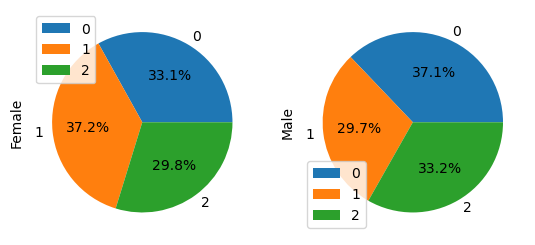

In [266]:
lab = list(x.index)

y.plot(kind = 'pie',
      labels = lab,
      autopct='%.1f%%',
      subplots = True
      )
plt.show()

### 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [267]:
x= data[(data['incident_cause'].isin(['Driver error']))]

In [268]:
x

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,age,age_segment
941,46710738,Male,1977-04-28,MO,9628349361,Gold,74761374,Driver error,2018-10-30,Auto,No,Material only,1830.000000,1.0,No,0,48,senior
751,28932340,Male,1996-01-05,LA,6522658231,Gold,25213498,Driver error,2018-10-30,Auto,Unknown,Material only,12470.498519,1.0,No,0,29,adult
697,86491727,Female,1997-01-29,IL,2941873286,Gold,32178193,Driver error,2018-10-30,Home,Unknown,Material only,1860.000000,1.0,No,0,28,adult
238,40480522,Female,1984-05-30,NV,7392596835,Gold,52377605,Driver error,2018-10-30,Auto,Unknown,Material and injury,26310.000000,1.0,No,0,41,senior
1054,51033228,Male,1985-10-13,IN,5344622657,Gold,50927161,Driver error,2018-10-23,Auto,No,Material and injury,30890.000000,2.0,No,0,40,senior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,84147585,Male,2072-10-18,AK,7435694783,Gold,30280492,Driver error,2017-01-07,Auto,Unknown,Material only,2380.000000,1.0,No,0,-47,children
581,97514724,Male,2069-06-08,FL,6416847986,Platinum,97666948,Driver error,2017-01-01,Home,No,Injury only,19120.000000,1.0,No,0,-44,children
383,25634799,Female,2074-11-04,KS,7247813692,Platinum,36457152,Driver error,2017-01-01,Auto,No,Material only,2900.000000,2.0,No,0,-49,children
739,29323970,Male,2071-03-03,NE,7836539163,Gold,58878919,Driver error,2017-01-01,Auto,Unknown,Material only,1840.000000,1.0,Yes,0,-46,children


In [269]:
y = x.groupby(by= ['gender'])['CUST_ID'].count()

In [270]:
y

gender
Female     72
Male      184
Name: CUST_ID, dtype: int64

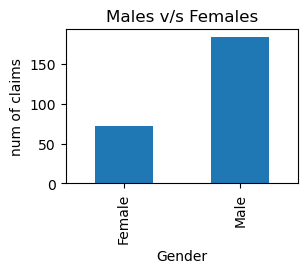

In [271]:
plt.figure(figsize =(3,2))
y.plot(kind ='bar')
plt.title('Males v/s Females')
plt.xlabel('Gender')
plt.ylabel('num of claims')
plt.show()


### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [272]:
y = data[(data['fraudulent']== 'Yes')]

In [273]:
y

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,age,age_segment
286,93915431,Male,2067-09-08,ME,1347851687,Gold,99775483,Other causes,2018-10-30,Auto,No,Material and injury,42124.5,1.0,Yes,0,-42,children
977,53042145,Female,2064-10-04,TN,1397467128,Platinum,9261301,Other causes,2018-10-23,Auto,Unknown,Material only,2553.0,4.0,Yes,0,-39,children
109,73456835,Female,1978-12-31,CO,3762944612,Silver,79953107,Other driver error,2018-10-16,Auto,No,Material only,2599.0,1.0,Yes,0,47,senior
399,69065193,Female,1980-09-26,MT,9634964127,Silver,94242984,Other driver error,2018-10-09,Auto,Unknown,Material and injury,36075.5,4.0,Yes,0,45,senior
145,65728108,Male,1984-11-22,SC,4386754587,Platinum,32116508,Other causes,2018-10-09,Auto,Unknown,Material and injury,47610.0,3.0,Yes,0,41,senior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,44453657,Female,1996-12-03,NC,4679842893,Gold,28106228,Driver error,2017-01-07,Auto,No,Material only,1276.5,1.0,Yes,0,29,adult
976,70088729,Male,2062-12-06,WI,4534752863,Silver,30422665,Driver error,2017-01-07,Home,No,Material only,1552.5,1.0,Yes,0,-37,children
212,36395486,Male,2071-03-06,ND,3654824683,Gold,43722644,Other causes,2017-01-07,Home,No,Material only,3335.0,3.0,Yes,0,-46,children
739,29323970,Male,2071-03-03,NE,7836539163,Gold,58878919,Driver error,2017-01-01,Auto,Unknown,Material only,1840.0,1.0,Yes,0,-46,children


In [274]:
x=y.groupby(by=['age_segment'])['fraudulent'].count()

In [275]:
x

age_segment
adult        20
children     96
senior      131
Name: fraudulent, dtype: int64

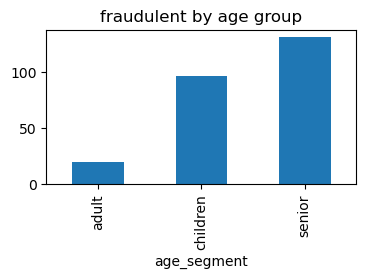

In [276]:
plt.figure(figsize= (4,2))
x.plot(kind = 'bar')
plt.title('fraudulent by age group')
plt.show()

### 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [277]:
data['month_year']= data.claim_date.dt.strftime('%Y- %B')

In [278]:
data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,age,age_segment,month_year
941,46710738,Male,1977-04-28,MO,9628349361,Gold,74761374,Driver error,2018-10-30,Auto,No,Material only,1830.000000,1.0,No,0,48,senior,2018- October
226,17682060,Female,2074-11-21,NV,1861953465,Gold,49735712,Crime,2018-10-30,Home,Unknown,Material and injury,17020.000000,1.0,No,0,-49,children,2018- October
286,93915431,Male,2067-09-08,ME,1347851687,Gold,99775483,Other causes,2018-10-30,Auto,No,Material and injury,42124.500000,1.0,Yes,0,-42,children,2018- October
751,28932340,Male,1996-01-05,LA,6522658231,Gold,25213498,Driver error,2018-10-30,Auto,Unknown,Material only,12470.498519,1.0,No,0,29,adult,2018- October
1055,58451506,Male,2068-04-22,FL,6735747823,Gold,43042986,Natural causes,2018-10-30,Auto,No,Material only,2420.000000,1.0,No,0,-43,children,2018- October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,74155265,Male,1985-11-16,TX,3927394873,Gold,25647821,Natural causes,2017-01-01,Auto,No,Material only,2080.000000,1.0,No,0,40,senior,2017- January
120,39587790,Male,2065-01-10,LA,6151543516,Gold,39131766,Other causes,2017-01-01,Auto,No,Material only,2967.000000,1.0,Yes,0,-40,children,2017- January
181,61745840,Female,1994-07-24,MA,6126845472,Platinum,90591192,Other driver error,2017-01-01,Home,No,Material and injury,30930.000000,1.0,No,0,31,senior,2017- January
905,42664554,Female,1993-08-13,TN,3969732531,Gold,42280334,Other causes,2017-01-01,Auto,No,Injury only,27670.000000,1.0,No,0,32,senior,2017- January


In [279]:
x=data.groupby(by=['month_year'])['claim_amount'].sum().reset_index()

<Figure size 500x300 with 0 Axes>

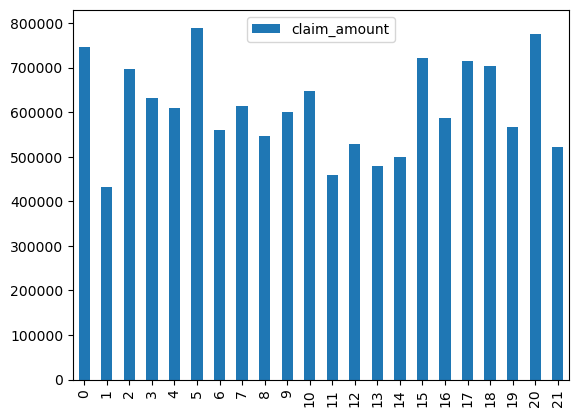

In [280]:
plt.figure(figsize = (5,3))
x.plot(kind='bar')
plt.show()

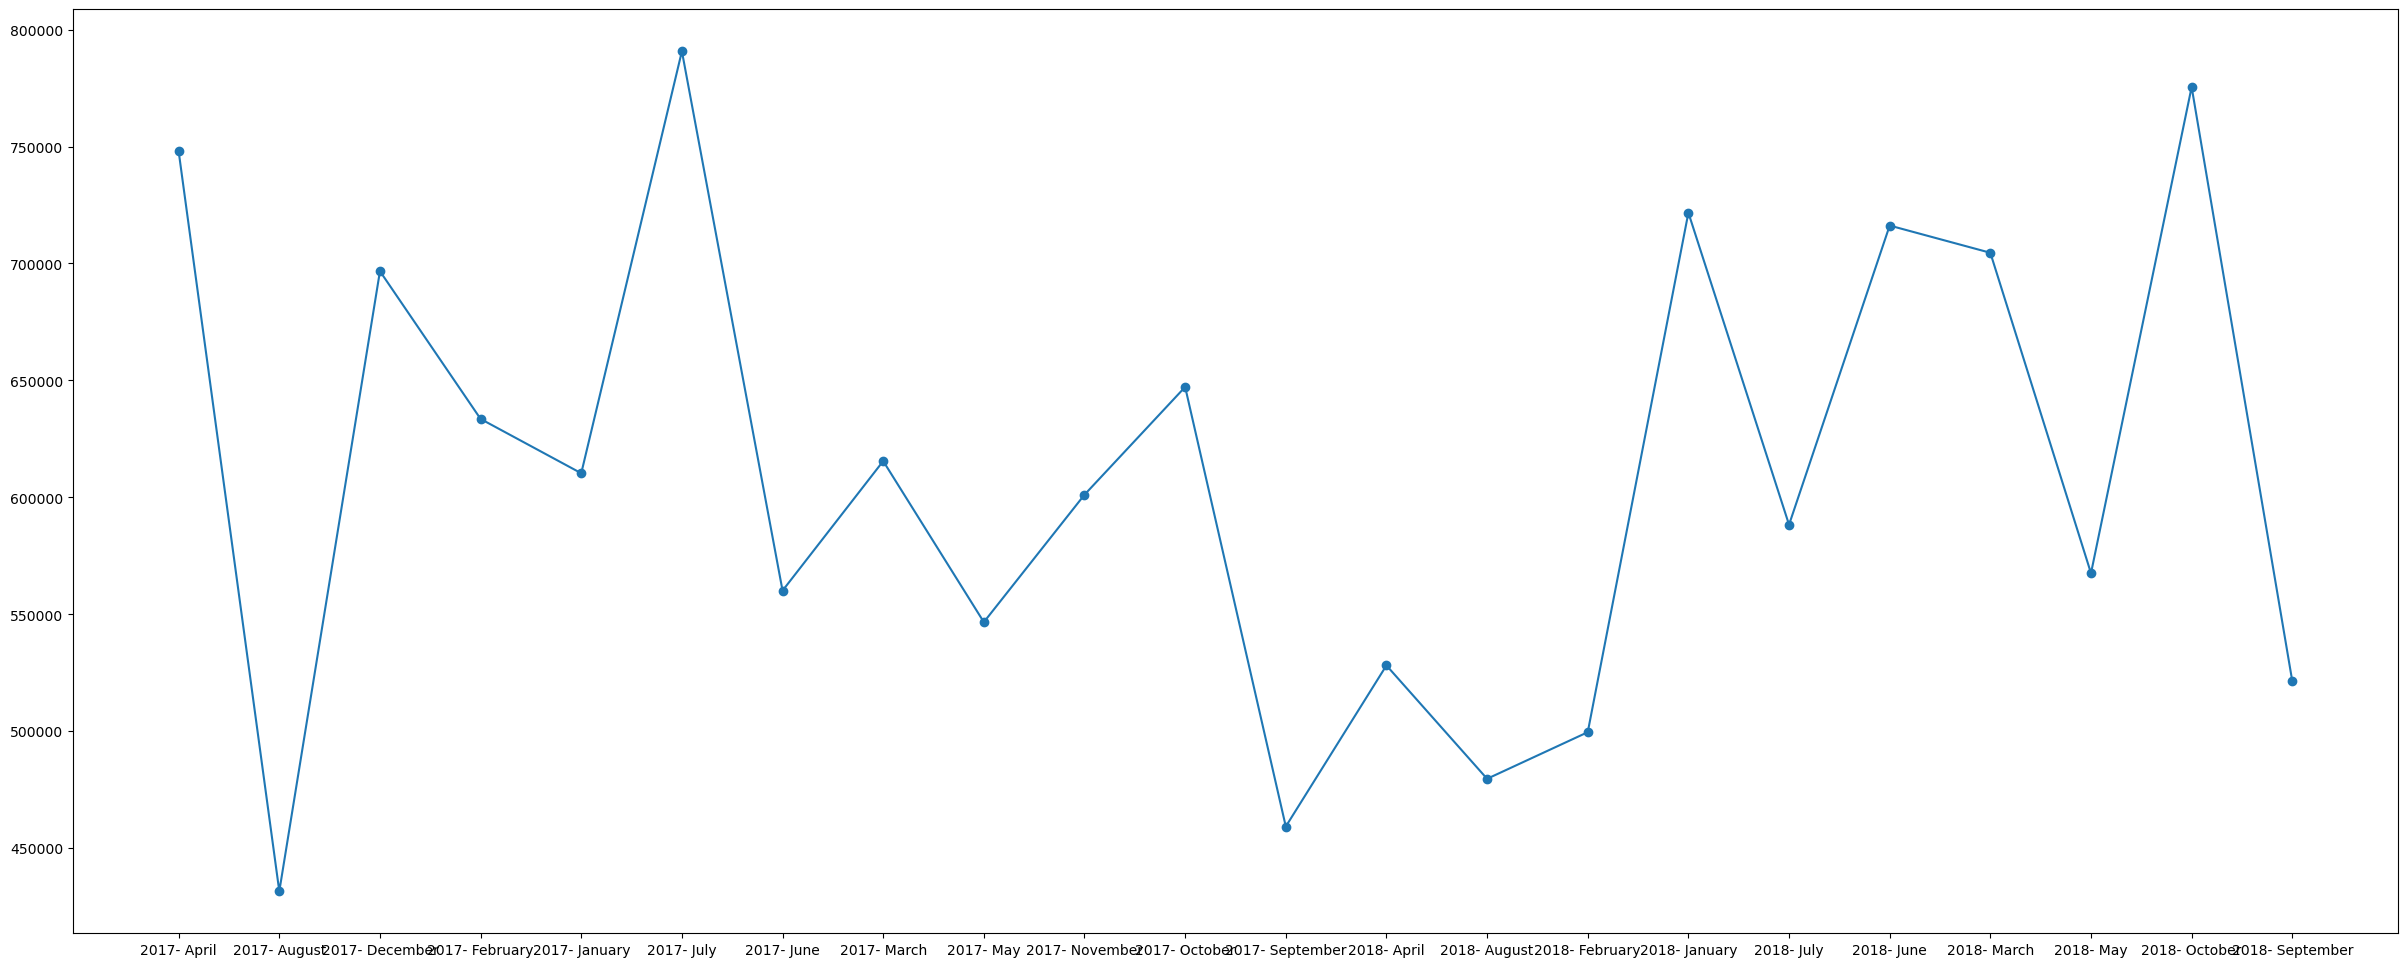

In [281]:
plt.figure(figsize=(30,12))
plt.plot(x ['month_year'],
        x ['claim_amount'],
        marker = 'o')
plt.show()

### 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims. 

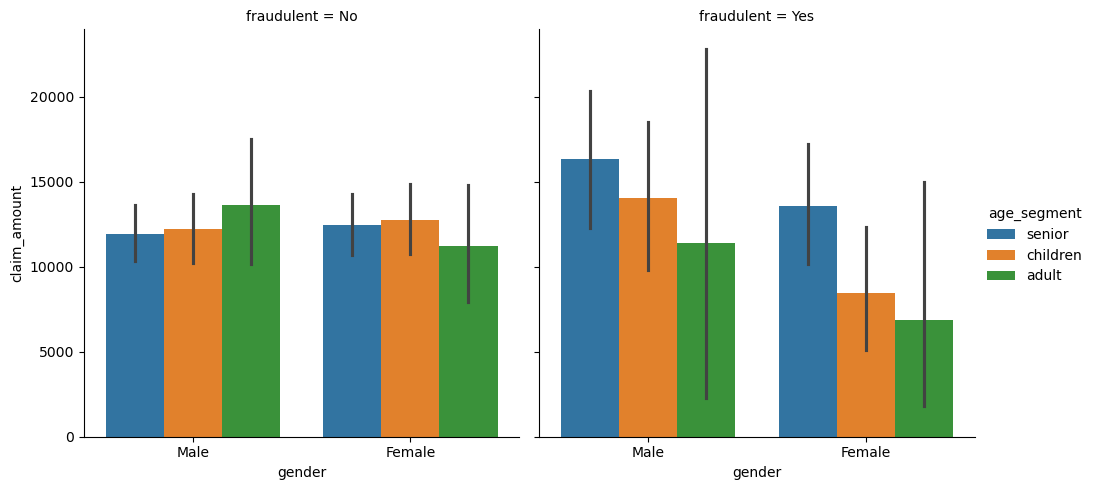

In [282]:
sns.catplot(data= data,
           x = 'gender',
           y = 'claim_amount',
           hue = 'age_segment',
            col = 'fraudulent',
            kind = 'bar'
                )
plt.show()

### Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements.

### 16. Is there any similarity in the amount claimed by males and females?

In [283]:
male_records = data[data['gender'] == 'Male'] 

In [284]:
male_records

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,age,age_segment,month_year
941,46710738,Male,1977-04-28,MO,9628349361,Gold,74761374,Driver error,2018-10-30,Auto,No,Material only,1830.000000,1.0,No,0,48,senior,2018- October
286,93915431,Male,2067-09-08,ME,1347851687,Gold,99775483,Other causes,2018-10-30,Auto,No,Material and injury,42124.500000,1.0,Yes,0,-42,children,2018- October
751,28932340,Male,1996-01-05,LA,6522658231,Gold,25213498,Driver error,2018-10-30,Auto,Unknown,Material only,12470.498519,1.0,No,0,29,adult,2018- October
1055,58451506,Male,2068-04-22,FL,6735747823,Gold,43042986,Natural causes,2018-10-30,Auto,No,Material only,2420.000000,1.0,No,0,-43,children,2018- October
1077,65208809,Male,2064-04-22,VA,2861286132,Platinum,91386759,Natural causes,2018-10-30,Auto,No,Material only,2290.000000,1.0,No,0,-39,children,2018- October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,97514724,Male,2069-06-08,FL,6416847986,Platinum,97666948,Driver error,2017-01-01,Home,No,Injury only,19120.000000,1.0,No,0,-44,children,2017- January
739,29323970,Male,2071-03-03,NE,7836539163,Gold,58878919,Driver error,2017-01-01,Auto,Unknown,Material only,1840.000000,1.0,Yes,0,-46,children,2017- January
334,22756942,Male,1982-10-09,FL,4628233126,Silver,70512964,Driver error,2017-01-01,Auto,Yes,Injury only,20310.000000,1.0,No,1,43,senior,2017- January
177,74155265,Male,1985-11-16,TX,3927394873,Gold,25647821,Natural causes,2017-01-01,Auto,No,Material only,2080.000000,1.0,No,0,40,senior,2017- January


In [285]:
female_records = data[(data['gender'] == 'Female')]

In [286]:
female_records

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,age,age_segment,month_year
226,17682060,Female,2074-11-21,NV,1861953465,Gold,49735712,Crime,2018-10-30,Home,Unknown,Material and injury,17020.000000,1.0,No,0,-49,children,2018- October
322,77510822,Female,1986-03-18,AK,4369347156,Silver,87329176,Other driver error,2018-10-30,Auto,Unknown,Material only,12470.498519,2.0,No,0,39,senior,2018- October
697,86491727,Female,1997-01-29,IL,2941873286,Gold,32178193,Driver error,2018-10-30,Home,Unknown,Material only,1860.000000,1.0,No,0,28,adult,2018- October
354,38011078,Female,1976-05-20,NE,2711231475,Gold,98795403,Crime,2018-10-30,Auto,Unknown,Material only,1940.000000,1.0,No,0,49,senior,2018- October
238,40480522,Female,1984-05-30,NV,7392596835,Gold,52377605,Driver error,2018-10-30,Auto,Unknown,Material and injury,26310.000000,1.0,No,0,41,senior,2018- October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,25634799,Female,2074-11-04,KS,7247813692,Platinum,36457152,Driver error,2017-01-01,Auto,No,Material only,2900.000000,2.0,No,0,-49,children,2017- January
1064,75934330,Female,1987-10-09,ME,9519413975,Platinum,56358443,Natural causes,2017-01-01,Auto,Yes,Injury only,20630.000000,1.0,No,1,38,senior,2017- January
181,61745840,Female,1994-07-24,MA,6126845472,Platinum,90591192,Other driver error,2017-01-01,Home,No,Material and injury,30930.000000,1.0,No,0,31,senior,2017- January
905,42664554,Female,1993-08-13,TN,3969732531,Gold,42280334,Other causes,2017-01-01,Auto,No,Injury only,27670.000000,1.0,No,0,32,senior,2017- January


In [287]:
male_claim = male_records['claim_amount']

In [288]:
male_claim

941      1830.000000
286     42124.500000
751     12470.498519
1055     2420.000000
1077     2290.000000
            ...     
581     19120.000000
739      1840.000000
334     20310.000000
177      2080.000000
120      2967.000000
Name: claim_amount, Length: 551, dtype: float64

In [289]:
female_claim = female_records['claim_amount']

In [290]:
female_claim

226     17020.000000
322     12470.498519
697      1860.000000
354      1940.000000
238     26310.000000
            ...     
383      2900.000000
1064    20630.000000
181     30930.000000
905     27670.000000
231     20200.000000
Name: claim_amount, Length: 527, dtype: float64

In [291]:
# define hypothesis 

# h0 = male and female claim amount has no significant difference similar
# ha = male and female claim amount has a significant difference 

# setup confidence interval 

# C.I = 95% 
# ALPH = 0.05 

# setup test statistics 
# we use t_test independent test 

In [292]:
stats.ttest_ind(male_claim , female_claim)

TtestResult(statistic=0.8848703612768525, pvalue=0.3764242430541379, df=1076.0)

In [293]:
# we fail to reject null hypothesis 

In [294]:
# here p-value = 0.336
# setup Alpha = 0.05

# p-value > Alpha
# i.e 0.336 > 0.005

# we failed to accept Alternative hypothesis
# We accept Null hypothesis

In [295]:
# It is a relationship among categorical variables
# so we use Chi-square test

In [296]:
data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,age,age_segment,month_year
941,46710738,Male,1977-04-28,MO,9628349361,Gold,74761374,Driver error,2018-10-30,Auto,No,Material only,1830.000000,1.0,No,0,48,senior,2018- October
226,17682060,Female,2074-11-21,NV,1861953465,Gold,49735712,Crime,2018-10-30,Home,Unknown,Material and injury,17020.000000,1.0,No,0,-49,children,2018- October
286,93915431,Male,2067-09-08,ME,1347851687,Gold,99775483,Other causes,2018-10-30,Auto,No,Material and injury,42124.500000,1.0,Yes,0,-42,children,2018- October
751,28932340,Male,1996-01-05,LA,6522658231,Gold,25213498,Driver error,2018-10-30,Auto,Unknown,Material only,12470.498519,1.0,No,0,29,adult,2018- October
1055,58451506,Male,2068-04-22,FL,6735747823,Gold,43042986,Natural causes,2018-10-30,Auto,No,Material only,2420.000000,1.0,No,0,-43,children,2018- October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,74155265,Male,1985-11-16,TX,3927394873,Gold,25647821,Natural causes,2017-01-01,Auto,No,Material only,2080.000000,1.0,No,0,40,senior,2017- January
120,39587790,Male,2065-01-10,LA,6151543516,Gold,39131766,Other causes,2017-01-01,Auto,No,Material only,2967.000000,1.0,Yes,0,-40,children,2017- January
181,61745840,Female,1994-07-24,MA,6126845472,Platinum,90591192,Other driver error,2017-01-01,Home,No,Material and injury,30930.000000,1.0,No,0,31,senior,2017- January
905,42664554,Female,1993-08-13,TN,3969732531,Gold,42280334,Other causes,2017-01-01,Auto,No,Injury only,27670.000000,1.0,No,0,32,senior,2017- January


In [297]:
x = pd.crosstab(data.age_segment,data.Segment)

In [298]:
# define Hypothesis

# H0 = No relationship
# Ha = There is a relationship

# columns = age category & segment

# set up confidence interval
#   ---- C.I = 95%
#   ----Alpha = 0.05

# test statistic
#   --- Chi-square test

In [299]:
# we need cross tab, which means cross table for Age group and semgemnt

In [302]:
x

Segment,Gold,Platinum,Silver
age_segment,,,
adult,37,35,41
children,132,134,135
senior,202,192,170


In [304]:
# Perform test statistic
stats.chi2_contingency(x)


Chi2ContingencyResult(statistic=2.5363870358309955, pvalue=0.6381321979200758, dof=4, expected_freq=array([[ 38.88961039,  37.84137291,  36.2690167 ],
       [138.00649351, 134.28664193, 128.70686456],
       [194.1038961 , 188.87198516, 181.02411874]]))

In [ ]:

# p-value = 0.90
# Alpha   = 0.05

# p-value > Alpha 
# 0.90 > 0.05

# so we accept null hypothesis
# we fail to accept to alternative hypothesis(reject hypothesis)

# Result  :  There is a no relationship between age category and segment

In [305]:
# we dont now how much rise in claim amount
# so lets assume it is 50%

# claim is there is a significant rise in claim amount
# u > 50%


In [306]:
# define Hypothesis

# h0: u<=50  (u= average amount claim)
# ha: u>50

# set up confidence intervals
# C.I = 95%
# Alpha = 0.05

# setup test statistics
# we use t_test one sample 
# because there is no standard deviation

# parameters = claim_amount
# year = 2018

In [308]:

stats.ttest_1samp(data.claim_amount[data.claim_date.dt.year==2018],10000)

TtestResult(statistic=4.371256632390438, pvalue=1.5155175751799137e-05, df=480)

In [309]:
# p-value = 9.43584422198333e-06
# Alpha = 0.05

# p-value < Alpha
# 9.43584422198333e-06 < 0.05

# We fail to accept null hypothesis
# we accept the alternative hypothesis

# The current year has a significant rise in claim amounts compared to 2016-17 fiscal average $10000.


In [310]:

# here we are finding relationship between two numerical variables

In [311]:
# paremeters 
# total_no_of_policy_claims
# total_claimed amount

In [312]:
# we use correlation
# correlation tells the relationship between the two numerical variable(columns

In [317]:

data.total_policy_claims.corr(data.claim_amount)

-0.014800926105369972

In [316]:
There is a negative correlation among total_policy_claims and claim_amount

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,age,age_segment,month_year
941,46710738,Male,1977-04-28,MO,9628349361,Gold,74761374,Driver error,2018-10-30,Auto,No,Material only,1830.000000,1.0,No,0,48,senior,2018- October
226,17682060,Female,2074-11-21,NV,1861953465,Gold,49735712,Crime,2018-10-30,Home,Unknown,Material and injury,17020.000000,1.0,No,0,-49,children,2018- October
286,93915431,Male,2067-09-08,ME,1347851687,Gold,99775483,Other causes,2018-10-30,Auto,No,Material and injury,42124.500000,1.0,Yes,0,-42,children,2018- October
751,28932340,Male,1996-01-05,LA,6522658231,Gold,25213498,Driver error,2018-10-30,Auto,Unknown,Material only,12470.498519,1.0,No,0,29,adult,2018- October
1055,58451506,Male,2068-04-22,FL,6735747823,Gold,43042986,Natural causes,2018-10-30,Auto,No,Material only,2420.000000,1.0,No,0,-43,children,2018- October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,74155265,Male,1985-11-16,TX,3927394873,Gold,25647821,Natural causes,2017-01-01,Auto,No,Material only,2080.000000,1.0,No,0,40,senior,2017- January
120,39587790,Male,2065-01-10,LA,6151543516,Gold,39131766,Other causes,2017-01-01,Auto,No,Material only,2967.000000,1.0,Yes,0,-40,children,2017- January
181,61745840,Female,1994-07-24,MA,6126845472,Platinum,90591192,Other driver error,2017-01-01,Home,No,Material and injury,30930.000000,1.0,No,0,31,senior,2017- January
905,42664554,Female,1993-08-13,TN,3969732531,Gold,42280334,Other causes,2017-01-01,Auto,No,Injury only,27670.000000,1.0,No,0,32,senior,2017- January
